In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_churn = pd.read_csv("Churn_Modelling.csv")
df_churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df_churn_Copy = df_churn.copy()

In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dealing with missing data

In [6]:
df_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
columns = df_churn.columns
columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Doing Lable Encoder for Gender to change from categorical to numerical

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_churn['Gender'])
df_churn['Gender'] = le.transform(df_churn['Gender'])
df_churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,1,27,2,134603.88,1,1,1,71725.73,0


Changing Geography from categorical to numerical <br>
there is different ways to do it. I choose mapping to do that

In [9]:
df_churn.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
dict_Geography = {'France':0, 'Spain':1, 'Germany':2}
# df_churn['Geography'] = df_churn['Geography'].replace(dict_Geography)
df_churn["Geography"] = df_churn['Geography'].map(dict_Geography)

# df_dummies = pd.get_dummies(data=df_churn['Geography'])
# df_churn = pd.concat([df_churn,df_dummies], axis=1)
# df_churn.drop('Geography', axis=1, inplace=True)

df_churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,1,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,2,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0


Finally, I dropped 3 columns that it seems useless.

In [11]:
df_churn.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df_churn.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
5,645,1,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,2,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


Here I checked all the column's data for Number of unique Values, Min, Max, Mean, Median, Mode<br>
With dealing to this data we can have an overview about our data set and distribution.

In [12]:
columns = df_churn.columns
for col in columns:
    print(f"{col} has {len(df_churn[col].unique())} unique values")
    print(f"Min {col} is {df_churn[col].min()} and Max is {df_churn[col].max()} ")
    print(f"mean {col} is {round(df_churn[col].mean(),2)}, median is {round(df_churn[col].median(),2)} and mode is {df_churn[col].mode()[0]} ")
    print("***************************************************************")

CreditScore has 460 unique values
Min CreditScore is 350 and Max is 850 
mean CreditScore is 650.53, median is 652.0 and mode is 850 
***************************************************************
Geography has 3 unique values
Min Geography is 0 and Max is 2 
mean Geography is 0.75, median is 0.0 and mode is 0 
***************************************************************
Gender has 2 unique values
Min Gender is 0 and Max is 1 
mean Gender is 0.55, median is 1.0 and mode is 1 
***************************************************************
Age has 70 unique values
Min Age is 18 and Max is 92 
mean Age is 38.92, median is 37.0 and mode is 37 
***************************************************************
Tenure has 11 unique values
Min Tenure is 0 and Max is 10 
mean Tenure is 5.01, median is 5.0 and mode is 2 
***************************************************************
Balance has 6382 unique values
Min Balance is 0.0 and Max is 250898.09 
mean Balance is 76485.89, median is 97

This is a function to write exact number of values on each bar in the bar chart.

In [13]:
def Bar_Lable(plot,N_Fraction):
    # plt.legend(title='Exited', labels=['Retained', 'Exited'])
    for p in plot.patches:
        plot.annotate(format(p.get_height(), N_Fraction), 
                      (p.get_x() + p.get_width() / 2, p.get_height()+(p.get_height()/50)),
                      ha='center', va='center')

Here I plot number of Retained and Churned customers <br>
'Exited', is the target variable and indicates whether the customer has churned (0 = No, 1 = Yes).

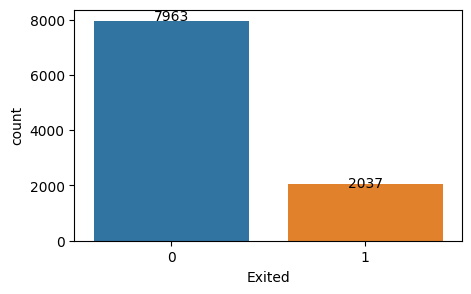

In [14]:
plt.figure(figsize=(5, 3))
plot = sns.countplot(x="Exited", data=df_churn)
Bar_Lable(plot,'.0f')

Numbers can give you an accurate view.<br>
So, I calculate percentage of Exited and Retained according to one of features.

In [15]:
def percentage(col, lst):
    for l in lst:
        n_a = len(df_churn_Copy[df_churn_Copy[col] == l].value_counts())
        n_e = len(df_churn_Copy[(df_churn_Copy[col] == l) & (df_churn_Copy['Exited'] == 1)].value_counts())
        print(f"Values in percentage For {l} are {round((n_e / n_a)*100,2)}% Exited and {round(((n_a - n_e) / n_a)*100,2)}% Retained")

Here I plot number of Retained and Churned customers according to Geography situation <br>
This shows that German customers have  churn twice as much as other customers.

Values in percentage For France are 16.15% Exited and 83.85% Retained
Values in percentage For Spain are 16.67% Exited and 83.33% Retained
Values in percentage For Germany are 32.44% Exited and 67.56% Retained


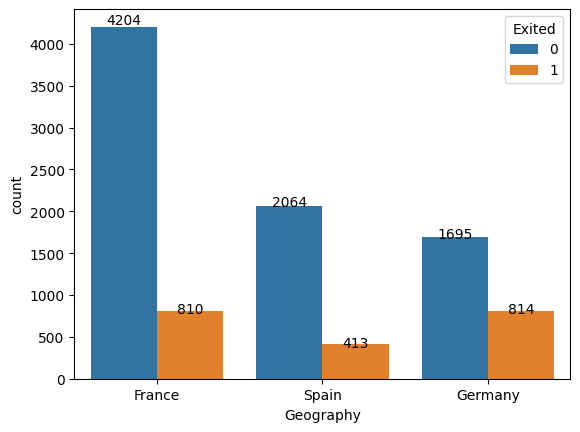

In [16]:
# plot = sns.catplot(data=df_churn_Copy, x='Geography', col='Gender', hue='Exited', kind='count', legend=False)
plot = sns.countplot(data=df_churn_Copy, x="Geography", hue="Exited")
percentage('Geography', ['France', 'Spain', 'Germany'])
Bar_Lable(plot,'.0f')

Here I plot number of Retained and Churned customers according to Number Of Products situation. <br>
This shows that customers who have had two products are more loyal than other customers.

Values in percentage For 1 are 27.71% Exited and 72.29% Retained
Values in percentage For 2 are 7.58% Exited and 92.42% Retained
Values in percentage For 3 are 82.71% Exited and 17.29% Retained
Values in percentage For 4 are 100.0% Exited and 0.0% Retained


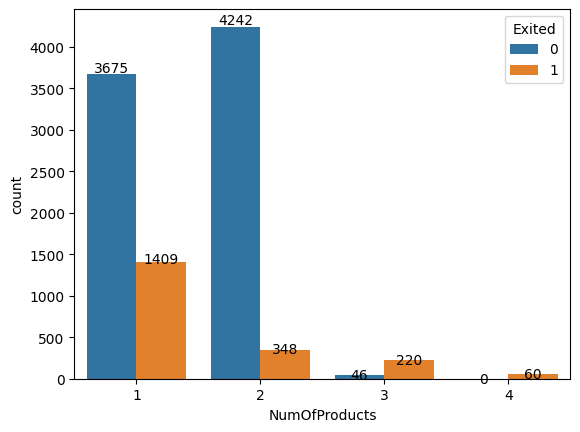

In [17]:
plot = sns.countplot(data=df_churn_Copy, x="NumOfProducts", hue="Exited")
percentage('NumOfProducts', [1, 2, 3, 4])
Bar_Lable(plot,'.0f')

Here I plot number of Retained and Churned customers according to Credit Card situation. <br>
This shows that having or not having a credit card had little effect on customer loyalty.


Values in percentage For 0 are 20.81% Exited and 79.19% Retained
Values in percentage For 1 are 20.18% Exited and 79.82% Retained


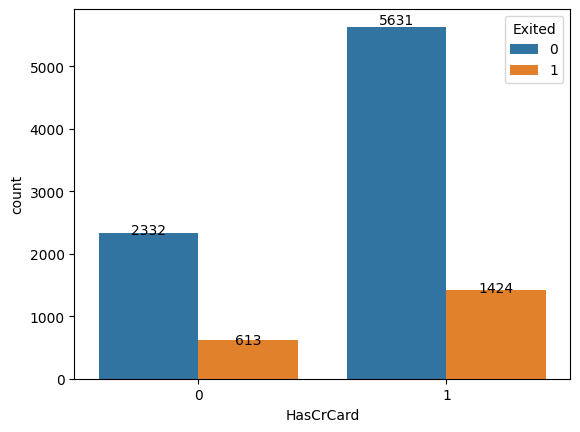

In [18]:
plot = sns.countplot(data=df_churn_Copy, x="HasCrCard", hue="Exited")
percentage('HasCrCard', [0, 1])
Bar_Lable(plot,'.0f')

Here I plot number of Retained and Churned customers acording to Gender. <br>
This shows that Male customers are more loyal than Female.

Values in percentage For Female are 25.07% Exited and 74.93% Retained
Values in percentage For Male are 16.46% Exited and 83.54% Retained


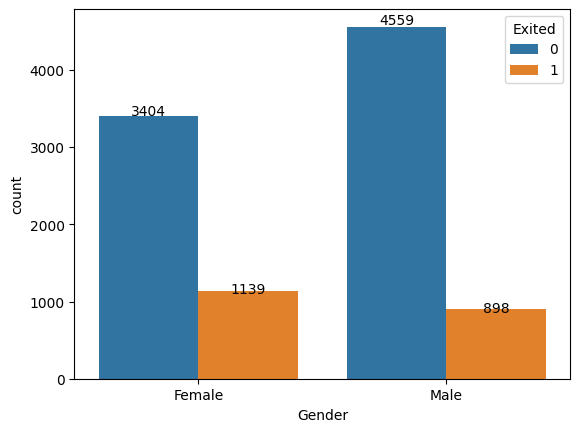

In [19]:
plot = sns.countplot(data=df_churn_Copy, x="Gender", hue="Exited")
percentage('Gender', ['Female', 'Male'])
Bar_Lable(plot,'.0f')

Here I plot number of Retained and Churned customers acording to Age Range. <br>
This shows that middle aged (45-65) are less loyal than youth(under 45) or old people(upper 65).

Values in percentage For (15, 20] are 5.62% Exited and 94.38% Retained
Values in percentage For (20, 25] are 7.85% Exited and 92.15% Retained
Values in percentage For (25, 30] are 7.52% Exited and 92.48% Retained
Values in percentage For (30, 35] are 9.11% Exited and 90.89% Retained
Values in percentage For (35, 40] are 14.96% Exited and 85.04% Retained
Values in percentage For (40, 45] are 26.8% Exited and 73.2% Retained
Values in percentage For (45, 50] are 46.35% Exited and 53.65% Retained
Values in percentage For (50, 55] are 58.35% Exited and 41.65% Retained
Values in percentage For (55, 60] are 53.27% Exited and 46.73% Retained
Values in percentage For (60, 65] are 40.0% Exited and 60.0% Retained
Values in percentage For (65, 70] are 18.32% Exited and 81.68% Retained
Values in percentage For (70, 75] are 11.36% Exited and 88.64% Retained
Values in percentage For (75, 80] are 0.0% Exited and 100.0% Retained
Values in percentage For (80, 85] are 11.11% Exited and 88.89% Retained
Va

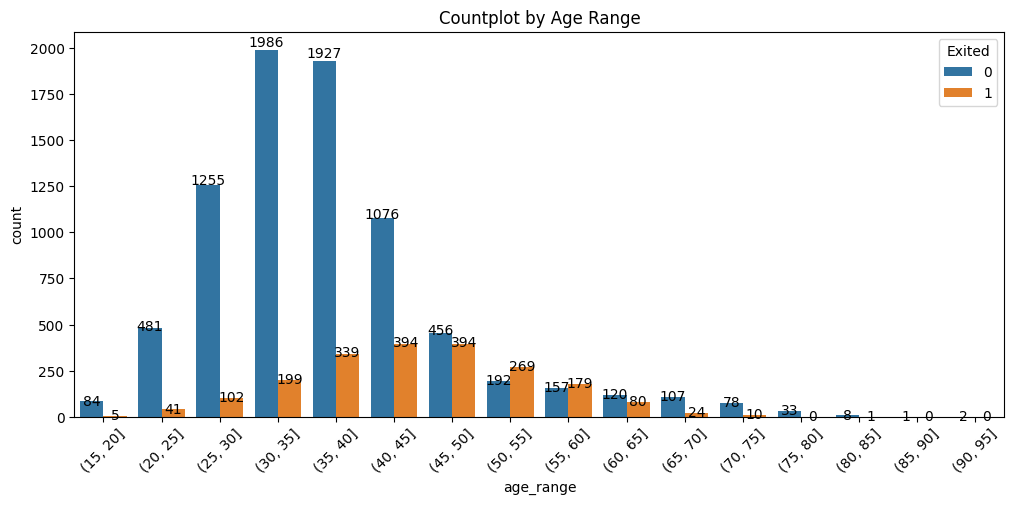

In [20]:
# Define the age ranges
age_ranges = np.arange(15, 96, 5)

# Create a new column for age ranges
df_churn['age_range'] = pd.cut(df_churn['Age'], bins=age_ranges)

plt.figure(figsize=(12, 5))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Countplot by Age Range')

# # Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
lst = df_churn['age_range'].unique()
for l in sorted(lst):
    n_a = len(df_churn[df_churn['age_range'] == l].value_counts())
    n_e = len(df_churn[(df_churn['age_range'] == l) & (df_churn['Exited'] == 1)].value_counts())
    print(f"Values in percentage For {l} are {round((n_e / n_a)*100,2)}% Exited and {round(((n_a - n_e) / n_a)*100,2)}% Retained")
# Create the countplot
plot = sns.countplot(data=df_churn, x='age_range', hue="Exited")
Bar_Lable(plot,'.0f')


Here I plot number of Retained and Churned customers acording to Estimated salary. <br>
This shows that ther is no significant difference in this case.

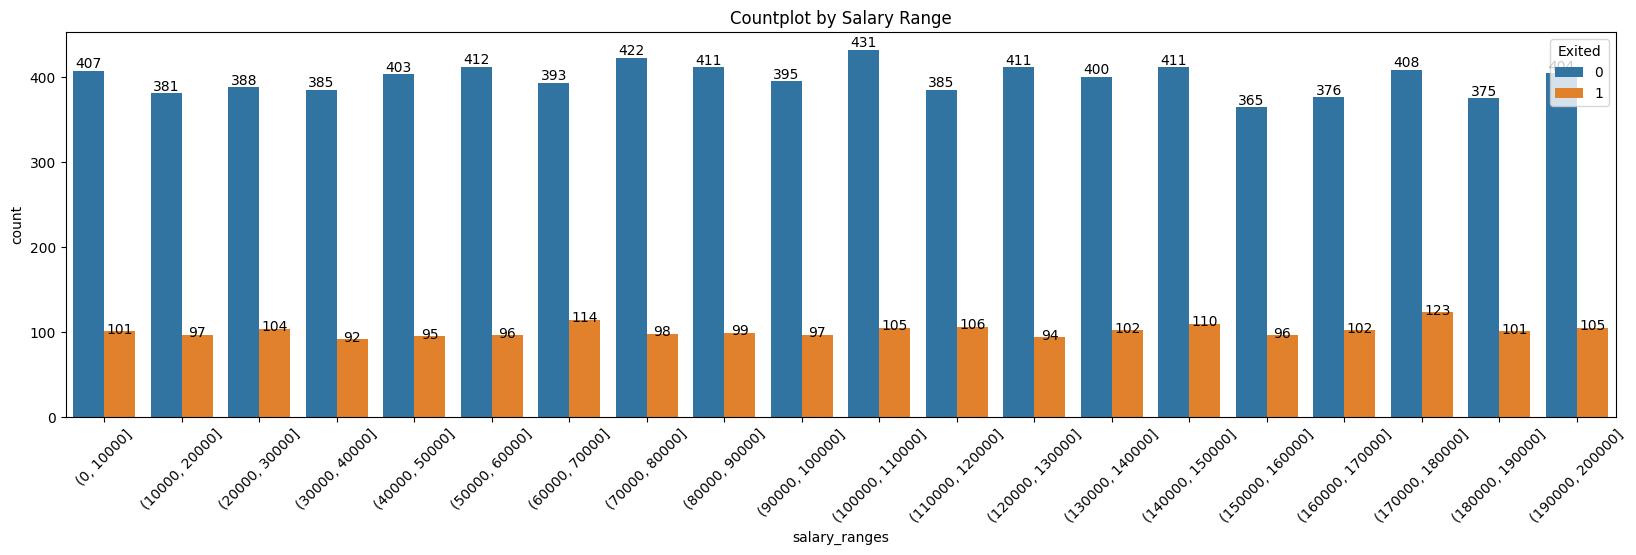

In [21]:
# Define the age ranges
salary_ranges = np.arange(0, 200001, 10000)
plt.figure(figsize=(20, 5))

# Create a new column for salary ranges
df_churn['salary_ranges'] = pd.cut(df_churn['EstimatedSalary'], bins=salary_ranges)

plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.title('Countplot by Salary Range')

# # Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Create the countplot
plot = sns.countplot(data=df_churn, x='salary_ranges', hue="Exited")
Bar_Lable(plot,'.0f')


Here I chcecked correlation between features and Target.

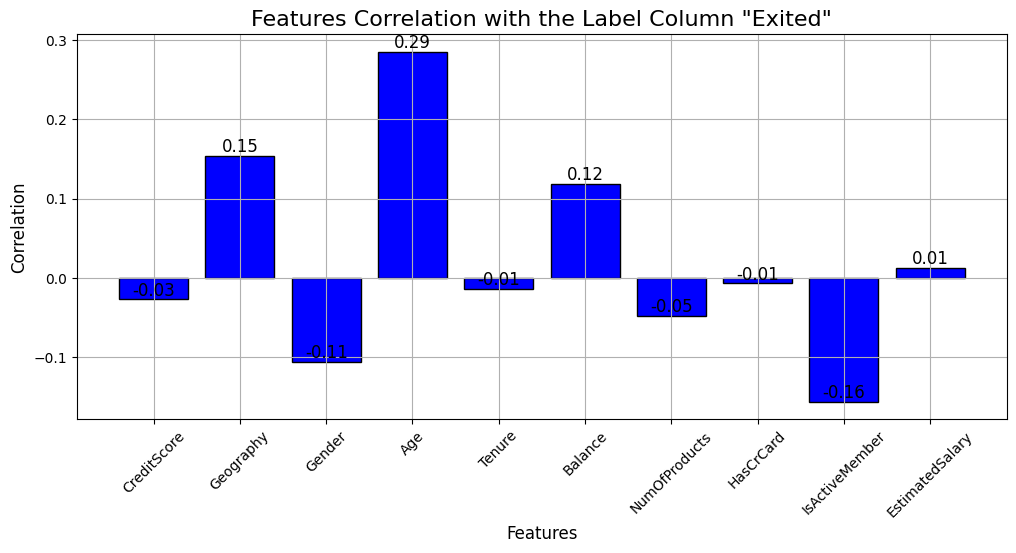

In [22]:
df_churn_cor = df_churn.drop(columns="Exited")
# Computing the correlation between the features and the label column
corrw = df_churn_cor.corrwith(df_churn['Exited'])

# Plotting the bar chart using matplotlib
plt.figure(figsize=(12, 5))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')

# Adding title, labels, and grid to the plot
plt.title('Features Correlation with the Label Column "Exited"', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations to the bars
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

Here I checked correlation between features.

<AxesSubplot: >

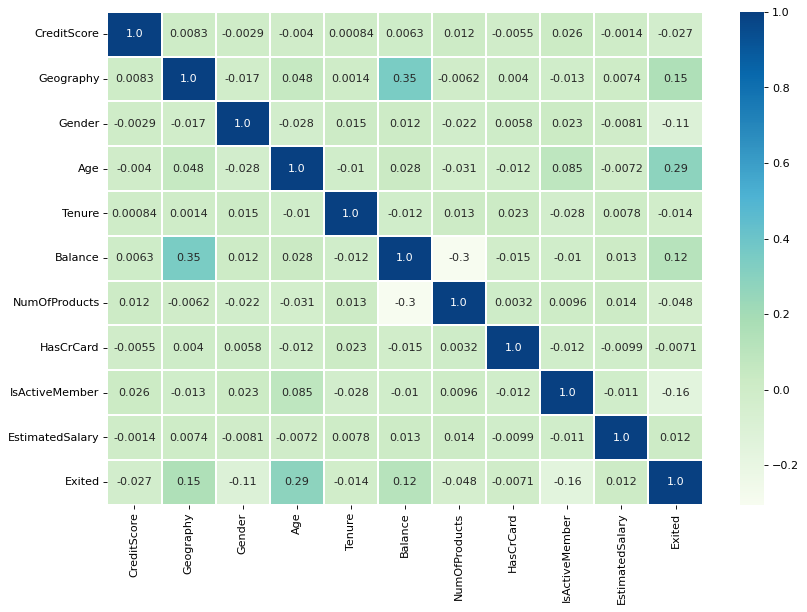

In [23]:
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(df_churn.corr(), annot=True, fmt="0.2", linewidths=0.1, cmap="GnBu")

Here I plot data distribution and  boxplot for each feature.

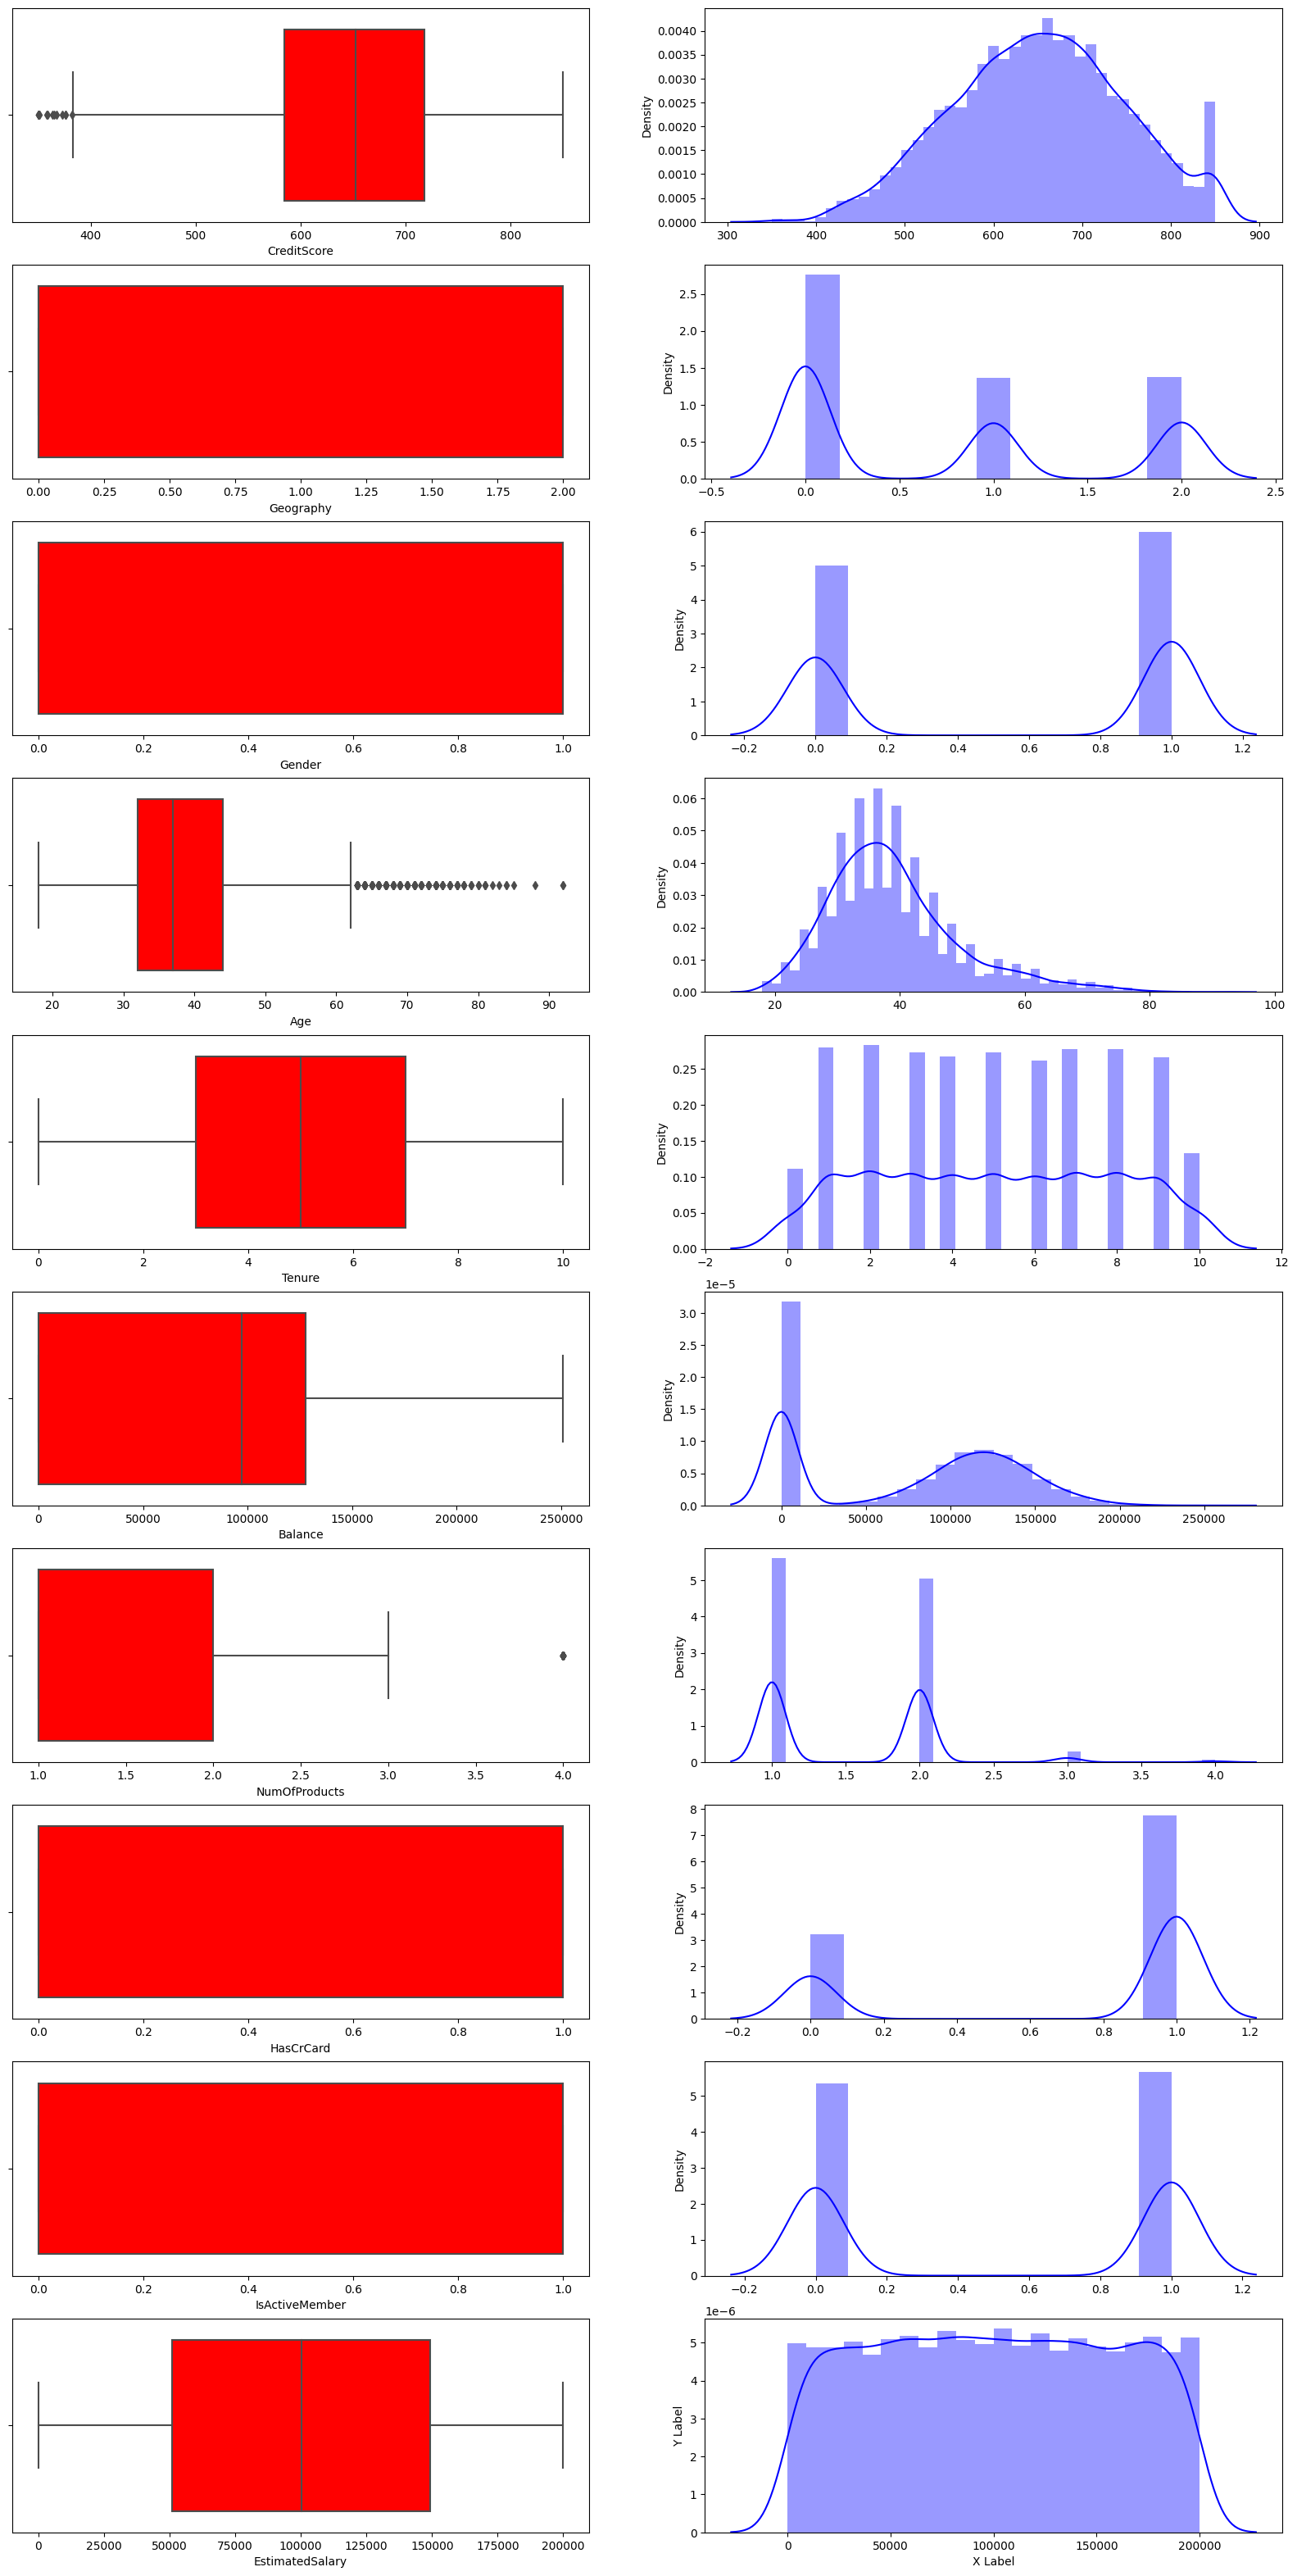

In [24]:
chk = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
fig, axes = plt.subplots(len(chk),2, figsize=(20, 40))
for i,col in enumerate(chk):
    sns.boxplot(x=df_churn[col],data=df_churn,color='r',saturation=1,ax=axes[i,0])
    plt.xlabel("X Label")
    plt.ylabel("Y Label")
    sns.distplot(x=df_churn[col],color='b',ax=axes[i,1])

In this function I check Normality of Data distribution for each feature.

In [25]:
def normality_test(data):
    alpha = 0.05
    statistic, p_value = stats.shapiro(data)
    alpha = 0.05  # significance level
    if p_value > alpha:
        return True
    return False

In this function I will replace outliers for each feature based on normal or non_normal distribution data.

In [26]:
def detect_Outlier(df, col):
    if normality_test(df[col].tolist()):
        UperBound = df[col].mean()+(3 * df[col].std())
        LowerBound = df[col].mean()-(3 * df[col].std())
        print(f"Lower Bound is {LowerBound} and Uper Bound is {UperBound}")
        print(f"{col.ljust(20)} has a Normal Distribution With {len(df[col][(df[col]<LowerBound) | (df[col]>UperBound)])} Outlier")
        print(df[col][(df[col]<LowerBound) | (df[col]>UperBound)])
        df[col][(df[col]<LowerBound) | (df[col]>UperBound)] = df[col].mode()[0]
    else:
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        IQR = q3 - q1
        UperBound = q3 + (1.5 * IQR)
        LowerBound = q1 - (1.5 * IQR)
        print(f"Lower Bound is {LowerBound} and Uper Bound is {UperBound}")
        print(f"{col.ljust(20)} has NOT a Normal Distribution With {len(df[col][(df[col]<LowerBound) | (df[col]>UperBound)])} Outlier")
        print(df[col][(df[col]<LowerBound) | (df[col]>UperBound)])
        df[col][(df[col]<LowerBound) | (df[col]>UperBound)] = df[col].mode()[0]

After considering to data, Due to my experience in Banking sector as an expert, there is no Outlier in the data set. <br> 
So I disabled this function

In [27]:
# for col in chk:  
#     detect_Outlier(df_churn, col)

I droped this culomns that I made for creating some plots and I don't need more.

In [28]:
df_churn.drop(columns=['age_range', 'salary_ranges'], axis=1, inplace=True)

# In this section I will start to creating models

At the first I di Min Max Scaler on my dataframe

In [29]:
chk = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_churn[chk] = scaler.fit_transform(df_churn[chk])

df_churn.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.516,0.5,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,1.000,0.5,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0
5,0.590,0.5,1.0,0.351351,0.8,0.453394,0.333333,1.0,0.0,0.748797,1
6,0.944,0.0,1.0,0.432432,0.7,0.000000,0.333333,1.0,1.0,0.050261,0
7,0.052,1.0,0.0,0.148649,0.4,0.458540,1.000000,1.0,0.0,0.596733,1
8,0.302,0.0,1.0,0.351351,0.4,0.566170,0.333333,0.0,1.0,0.374680,0
9,0.668,0.0,1.0,0.121622,0.2,0.536488,0.000000,1.0,1.0,0.358605,0


I will do splitting on my data for Train and Test

In [30]:
x_df_churn = df_churn.drop("Exited", axis=1)
y_df_churn = df_churn["Exited"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_df_churn, y_df_churn, test_size=0.3, shuffle=(True), stratify=(y_df_churn)) #, random_state=77

In [31]:
# from imblearn.over_sampling import SMOTE

# smt = SMOTE()
# X_train, Y_train = smt.fit_resample(X_train, Y_train)
# np.bincount(Y_train)

Since my data set is unbalanced I will use weighting in my algorithms.

In [32]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train)
class_weights = dict(zip(np.unique(Y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train)))
class_weights

{0: 0.6279153211338356, 1: 2.4544179523141656}

# **KNN Algorithm**

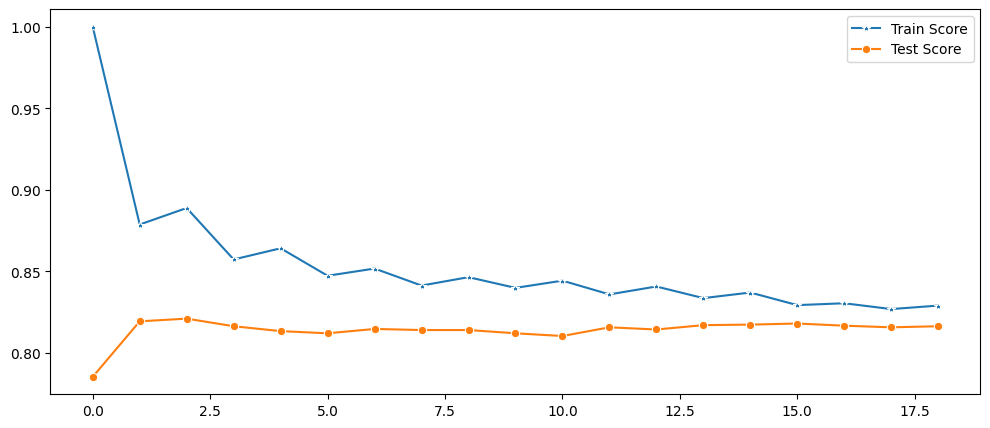

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

K_Range = list(range(1,20))
Train_Scores = []
Test_Scores = []

for K in K_Range:
    KNN = KNeighborsClassifier(n_neighbors=K , metric='minkowski', p=1) #Defult p is 1 means euclidian 2 is Manhatan Distance
    KNN.fit(X_train,Y_train)
    Predicted_Types_KNN = KNN.predict(X_test)
    Train_Scores.append(KNN.score(X_train,Y_train))
    Test_Scores.append(KNN.score(X_test,Y_test))

plt.figure(figsize=(12,5))
p = sns.lineplot(Train_Scores,marker='*',label='Train Score')
p = sns.lineplot(Test_Scores,marker='o',label='Test Score')

In [34]:
df_scores = pd.DataFrame(columns=['Algorithm', 'Train_Score', 'Test_Score'])

# **Cross Validation**

In [35]:
from sklearn.model_selection import cross_val_predict,cross_val_score

Score_KNN = cross_val_score(KNN,x_df_churn,y_df_churn,cv=10)
print('Score_KNN ==> ',Score_KNN)

Score_KNN ==>  [0.812 0.815 0.829 0.825 0.815 0.812 0.815 0.818 0.819 0.823]


Here I wrote a function that I will pass my algorithms and parameters to calculate and print the results.

In [36]:
from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
#Method to evaluate the performance of the model

def Model(Kind):
    global df_scores
    EXE_Model = Kind
    EXE_Model.fit(X_train,Y_train)
    Predicted_Model = EXE_Model.predict(X_test)
    Acc_Test = accuracy_score(Predicted_Model,Y_test)
    Acc_Train = EXE_Model.score(X_train,Y_train)
    print('Accuracy on Train: {:.3f}'.format(Acc_Train))
    print('Accuracy on Test : {:.3f}'.format(Acc_Test))
    print(classification_report(Y_test, Predicted_Model))

    # Compute confusion matrix
    cm = confusion_matrix(Y_test, Predicted_Model)
    plt.figure(figsize=(2,1))
    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    data = {'Algorithm':str(Kind)[:str(Kind).find("(")] , 'Train_Score':(round(Acc_Train,4)*100), 'Test_Score':(round(Acc_Test,4)*100)}
    df_scores = df_scores.append(data, ignore_index=True)

# **Nave Beyes Classifier**

Accuracy on Train: 0.829
Accuracy on Test : 0.833
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2389
           1       0.71      0.30      0.43       611

    accuracy                           0.83      3000
   macro avg       0.78      0.64      0.66      3000
weighted avg       0.82      0.83      0.81      3000



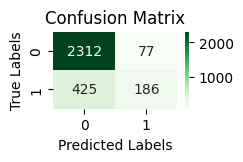

In [37]:
from sklearn.naive_bayes import GaussianNB

Model(GaussianNB())

# **Logistic Regression Algorithm**

Accuracy on Train: 0.704
Accuracy on Test : 0.711
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2389
           1       0.39      0.71      0.50       611

    accuracy                           0.71      3000
   macro avg       0.65      0.71      0.65      3000
weighted avg       0.80      0.71      0.74      3000



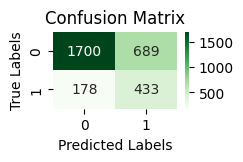

In [38]:
from sklearn.linear_model import LogisticRegression

Model(LogisticRegression(class_weight=class_weights))

# **Decision Tree Algorithm**

Accuracy on Train: 0.803
Accuracy on Test : 0.766
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      2389
           1       0.45      0.69      0.54       611

    accuracy                           0.77      3000
   macro avg       0.68      0.74      0.69      3000
weighted avg       0.81      0.77      0.78      3000



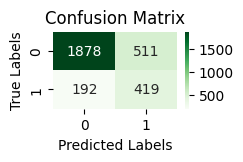

In [39]:
from sklearn.tree import DecisionTreeClassifier

Model(DecisionTreeClassifier(class_weight=class_weights,max_features=4, min_samples_leaf=20))

# **Random Forest Algorithm**

Accuracy on Train: 0.845
Accuracy on Test : 0.810
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2389
           1       0.52      0.72      0.61       611

    accuracy                           0.81      3000
   macro avg       0.72      0.78      0.74      3000
weighted avg       0.84      0.81      0.82      3000



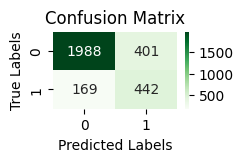

In [40]:
from sklearn.ensemble import RandomForestClassifier

Model(RandomForestClassifier(max_features=4, n_estimators=50, min_samples_leaf=20, class_weight=class_weights))

# **SVM Algorithm**

Accuracy on Train: 0.800
Accuracy on Test : 0.778
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2389
           1       0.47      0.71      0.57       611

    accuracy                           0.78      3000
   macro avg       0.69      0.75      0.71      3000
weighted avg       0.82      0.78      0.79      3000



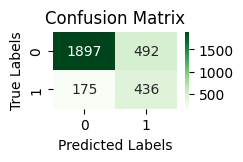

In [41]:
from sklearn.svm import SVC

Model(SVC(class_weight=class_weights))

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# SVM =SVC(class_weight=class_weights)

# # param = [{"kernel" : ["linear"] ,"C" : [0.01 , 0.1, 1, 10, 100]}]
# param = [{"kernel" : ["linear"] ,"C" : [0.01 , 0.1, 1, 10, 100]},
#          {"kernel" : ["rbf"], "gamma" : [0.01, 0.1, 0.2, 0.3], "C":  [0.01 , 0.1, 1, 10, 100]},
#          {"kernel" : ["poly"], "degree": [2], "C": [0.01, 0.1, 1, 10, 100]}]

# GS = GridSearchCV(SVM, param, cv=5, scoring="accuracy")
# GS.fit(x_df_churn,y_df_churn)
# print(GS.best_score_)
# print(GS.best_params_)

# , C=10, gamma=0.2, kernel='rbf'

# **XGBoost Algorithm**

Accuracy on Train: 0.881
Accuracy on Test : 0.866
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.76      0.50      0.60       611

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



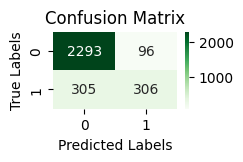

In [42]:
import xgboost as xgb

Model(xgb.XGBClassifier( max_depth=5, eta=0.1, min_child_weight=10))

A test with anonymous customer data with the best algorithm obtained in the previous stages.

In [43]:
df_scores.head(10)

,Algorithm,Train_Score,Test_Score
0,GaussianNB,82.87,83.27
1,LogisticRegression,70.36,71.10
2,DecisionTreeClassifier,80.27,76.57
3,RandomForestClassifier,84.46,81.00
4,SVC,80.00,77.77
5,XGBClassifier,88.07,86.63


In [44]:
final_model = xgb.XGBClassifier( max_depth=5, eta=0.1, min_child_weight=10)
final_model.fit(X_train, Y_train) 
unknown_customer = [[615, 2, 1, 45, 1, 50000.10, 2, 0, 1, 2348.88]]
unknown_customer = scaler.transform(unknown_customer)

print('Predicted Exited value for Unknown Customer is : ',final_model.predict(unknown_customer)[0])

Predicted Exited value for Unknown Customer is :  0
